# Hello PCA (Principal Component Analysis)

In [4]:
# Prerequisites
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Python Version: ", sys.version)


Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]


Perform PCA on MNIST dataset

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', parser="auto", as_frame=False)

X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"cummulative explained variance: {cumulative_explained_variance}")

cummulative explained variance: [0.09704664 0.16800588 0.22969677 0.28359097 0.33227894 0.37540125
 0.40812055 0.4369595  0.4645798  0.4881498  0.5092417  0.52947161
 0.54662979 0.56355091 0.57933732 0.59416685 0.60741246 0.62018143
 0.63205406 0.6435809  0.65424256 0.66430969 0.67384542 0.68297086
 0.69180491 0.7001981  0.70832389 0.71618755 0.72363488 0.73054347
 0.73712441 0.74360589 0.74963204 0.75549786 0.76119807 0.76663435
 0.77169222 0.7765708  0.7813851  0.78610776 0.79067523 0.79512359
 0.7993086  0.80329076 0.8071405  0.81089154 0.81451162 0.81802754
 0.82142812 0.82464686 0.82783703 0.83096508 0.83392491 0.83681446
 0.83965576 0.84237012 0.84506533 0.84765006 0.85018776 0.85263557
 0.85504063 0.85743326 0.85973735 0.86195267 0.86408988 0.86616213
 0.86819256 0.87016038 0.87208891 0.87397523 0.875845   0.87765583
 0.87943146 0.88118044 0.88283802 0.88447696 0.88609158 0.88764274
 0.88911887 0.89055063 0.89197158 0.89338311 0.89478485 0.89614222
 0.89748069 0.89880465 0.90010

In [7]:
d = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of dimensions required to preserve 95% of variance: {d}")

Number of dimensions required to preserve 95% of variance: 154


Plot cumulative explanation

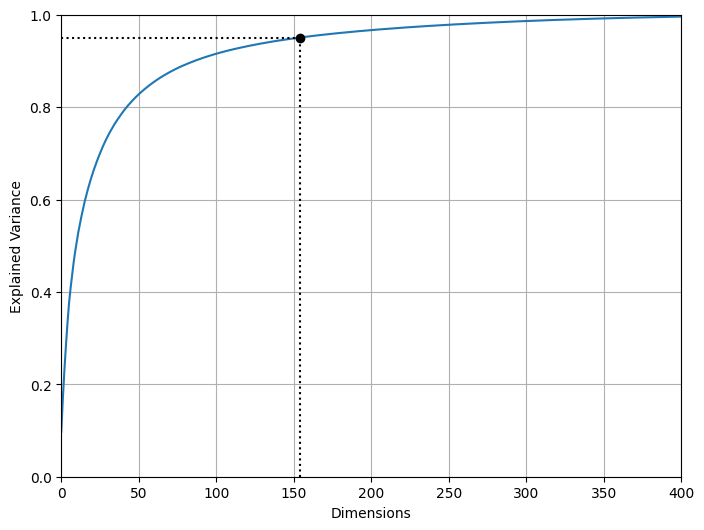

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

One cal also provide desired cumulative explained variance as a paramater to PCA

In [9]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

print(f"Number of principal components: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum()}")
print(f"Original shape: {X_train.shape}")
print(f"Reduced shape: {X_reduced.shape}")

Number of principal components: 154
Explained variance ratio: 0.9501960192613034
Original shape: (60000, 784)
Reduced shape: (60000, 154)


### Reverse PCA

In [11]:
X_recovered = pca.inverse_transform(X_reduced)

print(f"Receoveed shape: {X_recovered.shape}")

Receoveed shape: (60000, 784)


Plot original and compressed-uncompressed sample digits

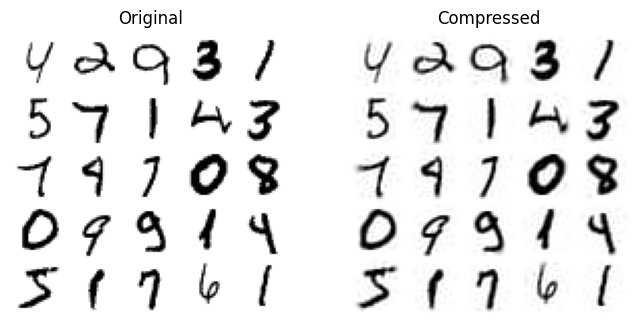

In [12]:
plt.figure(figsize=(8, 6))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")